
# Linear Regression Model Example

## Supervised Learning

### Regression
For this project, we will use Supervised Learning and the Regression model to predict poverty level. Poverty level is a continuous variable which can be any numerical value within a certain range. The regression model's algorithms would attempt to learn patterns that exist among the selected economic factors. If presented with the data of a state, the model would make a prediction of the proverty level based on previously learned patterns from the dataset.

### Classification
Classification is used to predict discrete outcomes. The target variable only has two possible values.

### Dataset for Regression and Classification
Dataset is divided into features and target. 
* Features are the variables used to make a prediction
* Target is the predicted outcome.

### Basic procedures for implementing a supervised learning model:
1. Split the data into input (X) and output (y).
2. Create an instance of the model with model = LinearRegression().
3. Train the model with the dataset with model.fit(X,y).
4. Create predictions with y_pred = model.predict(X).

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
import sklearn.datasets as datasets

# For splitting of data into train and test set
from sklearn.model_selection import train_test_split

# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
import sklearn.metrics as metrics

In [ ]:
# Load a CSV file as a Pandas DataFrame
# df = pd.read_csv(Path('../Resources/file_name.csv'))
#df.head()

# OR Read in data from S3 Buckets
# from pyspark import SparkFiles
# url ="https://YOUR-BUCKET-NAME.s3.amazonaws.com/<file_name.csv>"
# spark.sparkContext.addFile(url)
# df = spark.read.csv(SparkFiles.get("file_name.csv>"), sep=",", header=True, inferSchema=True)

# this our db endpoint url = "database-1.czpjmlarn3xk.us-east-2.rds.amazonaws.com"

In [ ]:
# OR connect to a database using SQLAlchemy and read in data from tables into a Pandas DataFrame 
# ENTER YOUR CODE HERE

# # from sqlalchemy import create_engine

# # Postgres username, password, and database name
# POSTGRES_ADDRESS = '' ## INSERT YOUR DB ADDRESS 
# POSTGRES_PORT = ''
# POSTGRES_USERNAME = 'username' ## CHANGE THIS TO YOUR POSTGRES USERNAME
# POSTGRES_PASSWORD = '*****' ## CHANGE THIS TO YOUR POSTGRES PASSWORD POSTGRES_DBNAME = 'database' ## CHANGE THIS TO YOUR DATABASE NAME

# # A long string that contains the necessary Postgres login information
# postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
#   .format(username=POSTGRES_USERNAME,
#    password=POSTGRES_PASSWORD,
#    ipaddress=POSTGRES_ADDRESS,
#    port=POSTGRES_PORT,
#    dbname=POSTGRES_DBNAME))

# # Create the connection
# cnx = create_engine(postgres_str)

In [ ]:
# Create engine
engine = create_engine(f'postgresql://{creds.PGUSER}:{creds.PGPASSWORD}@{creds.PGHOST}:5432/{creds.PGDATABASE}')

In [ ]:
# Create our session (link) from Python to the DB
session = Session(bind=engine.connect())


In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

## Data Preprocessing
* Visualize dataset
* Reshape data format if needed
* Use standardizing functions if necessary: MinMax and Standard functions

In [ ]:
plt.scatter(df.YearsExperience, df.Salary)
plt.xlabel('')
plt.ylabel('')
plt.show()

# xlabel = independent variable
# ylabel = target variable that we want to predict 

### Reshape data format if necessary

In [ ]:
# Use reshape() to format data to meet the Scikit-learn library requirements
# Reshape dataset format 
X = df.x_column_name.values.reshape(-1, 1)

In [ ]:
# To examine the first 5 entries in X
X[:5]

In [ ]:
# To examine the shape of X
X.shape

# 30 rows and 1 column

### Scale standardization - MinMax

In [ ]:
# MinMax shrinks the range of each figure 
import sklearn.preprocessing as preprocessing
 
minmax = preprocessing.MinMaxScaler()
# X is a matrix with float type
minmax.fit(X)
X_minmax = minmax.transform(X)

### Scale standardization - StandardScaler

In [ ]:
import sklearn.preprocessing as preprocessing

std = preprocessing.StandardScaler()
# X is a matrix
std.fit(X)
X_std = std.transform(X)

## Assigning target variable

In [ ]:
# Assign target variable
y = df.Salary

## Splitting into Train & Test set
Conventional split is: 75% for training, 25% for testing set

* Model uses the training dataset to learn from it
* Model uses the testing dataset to assess its performance

In [ ]:
# Split the dataset into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

## Creating instance of linear regression model

In [ ]:
# Create a model with scikit-learn
model = LinearRegression()

## Training (fitting) the model

In [ ]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

## Predicting and evaluating the model
Generate predictions and evaluate performance of model

In [11]:
# We use the predict() on the model to predict the output
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)


# for regression we use R2 score and MAE(mean absolute error)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

(30,)


## Plotting the results
linear regression model generates a straight line that best fits the overall trend of the data

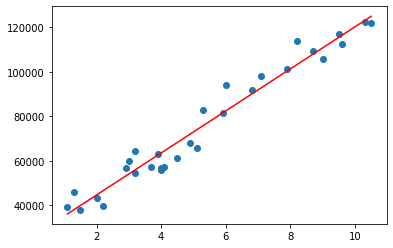

In [12]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[9449.96232146]
25792.20019866871


* the slope is represented by model.coef_
* model.intercept_ is the y-intercept